In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('pizza-hut.xlsx')
df.head()

,Bill_ID,Channel,Transaction_Date,Sales_Amount,Customer_ID,Customer_Gender,Voucher_Used
0,1235,Take Away,2021-09-30 00:00:00+00:00,275643,253800,Unknown,No
1,2196,Take Away,2021-09-30 00:00:00+00:00,316239,158088,Male,No
2,13633,Delivery,2021-09-30 00:00:00+00:00,558749,37215,Female,No
3,14025,Delivery,2021-09-30 00:00:00+00:00,1761717,216385,Female,No
4,14692,Delivery,2021-09-30 00:00:00+00:00,283468,33225,Male,No


In [5]:
print("Shape of the dataset:", df.shape)

print("\nData types:")
for column, dtype in df.dtypes.items():
    print(f"{column:<20} {dtype}")

df.columns = df.columns.str.strip()

print("\nMissing values:")
for column in df.columns:
    print(f"{column:<20} {df[column].isnull().sum()}")

Shape of the dataset: (508365, 7)

Data types:
Bill_ID              int64
Channel              object
Transaction_Date     object
Sales_Amount         int64
Customer_ID          int64
Customer_Gender      object
Voucher_Used         object

Missing values:
Bill_ID              0
Channel              0
Transaction_Date     0
Sales_Amount         0
Customer_ID          0
Customer_Gender      0
Voucher_Used         0


In [6]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Date'].head()

0   2021-09-30 00:00:00+00:00
1   2021-09-30 00:00:00+00:00
2   2021-09-30 00:00:00+00:00
3   2021-09-30 00:00:00+00:00
4   2021-09-30 00:00:00+00:00
Name: Transaction_Date, dtype: datetime64[ns, UTC]

In [7]:
df.describe()

,Bill_ID,Sales_Amount,Customer_ID
count,508365.000000,5.083650e+05,508365.000000
mean,254182.000000,3.096550e+05,172916.848200
std,146752.479135,3.049327e+05,99693.090627
min,0.000000,-2.363000e+03,0.000000
25%,127091.000000,1.779810e+05,86710.000000
50%,254182.000000,2.611080e+05,172927.000000
75%,381273.000000,3.638960e+05,259209.000000
max,508364.000000,3.133970e+07,345583.000000


In [8]:
total_sales = df['Sales_Amount'].sum()
print("Total Sales Amount:", total_sales)

Total Sales Amount: 157417770414


In [9]:
print("Unique values in channel:\n", df['Channel'].value_counts())
print("\nUnique values in customer_gender:\n", df['Customer_Gender'].value_counts())
print("\nUnique values in voucher_used:\n", df['Voucher_Used'].value_counts())

Unique values in channel:
 Channel
Take Away    250882
Delivery     241097
Dine In       16386
Name: count, dtype: int64

Unique values in customer_gender:
 Customer_Gender
Unknown    301779
Male       140201
Female      66385
Name: count, dtype: int64

Unique values in voucher_used:
 Voucher_Used
No     444136
Yes     64229
Name: count, dtype: int64


In [10]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['bill_id', 'channel', 'transaction_date', 'sales_amount', 'customer_id',
       'customer_gender', 'voucher_used'],
      dtype='object')


In [11]:
# Filter data for September 2021
september_data = df[df['transaction_date'].dt.to_period('M') == '2021-09']

# Check the number of transactions in September 2021
num_transactions_september = len(september_data)
print(f"Number of transactions in September 2021: {num_transactions_september}")

# Analyze daily sales in September 2021
daily_sales_september = september_data.groupby(september_data['transaction_date'].dt.date)['sales_amount'].sum()
print("\nDaily Sales in September 2021:\n", daily_sales_september)

Number of transactions in September 2021: 230

Daily Sales in September 2021:
 transaction_date
2021-09-30    71214505
Name: sales_amount, dtype: int64


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_18166/2475259245.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  september_data = df[df['transaction_date'].dt.to_period('M') == '2021-09']


In [12]:
# Extract year and month for monthly analysis
df['YearMonth'] = df['transaction_date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['sales_amount'].sum().reset_index()

# Display the results
print("Monthly Sales Trends:\n", monthly_sales)

Monthly Sales Trends:
    YearMonth  sales_amount
0    2021-09      71214505
1    2021-10    7748034194
2    2021-11    6971930209
3    2021-12    8302909416
4    2022-01    7776409136
5    2022-02    7674409130
6    2022-03    7695047754
7    2022-04    7122599579
8    2022-05    8568532306
9    2022-06    8179670533
10   2022-07    7617120437
11   2022-08    7492380158
12   2022-09    7213884071
13   2022-10    6922196951
14   2022-11    6051384385
15   2022-12    7408246302
16   2023-01    8699816958
17   2023-02    5832369834
18   2023-03    7191362853
19   2023-04    6871167794
20   2023-05    8607552965
21   2023-06    7399530944


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_18166/468767586.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['transaction_date'].dt.to_period('M')


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_18166/2744171805.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['transaction_date'].dt.to_period('M')


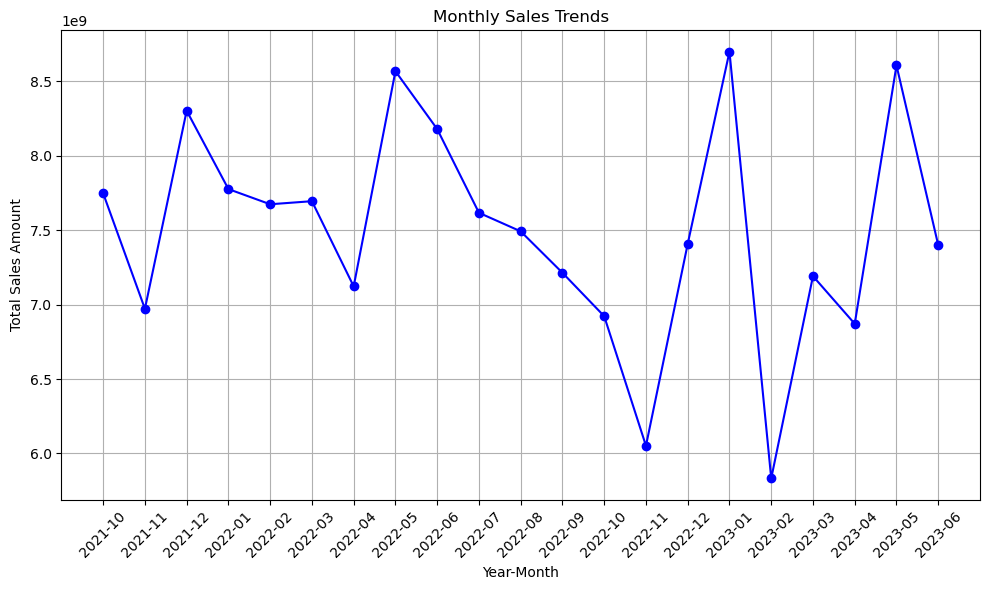

In [13]:
# Extract year and month for monthly analysis
df['YearMonth'] = df['transaction_date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = df.groupby('YearMonth')['sales_amount'].sum().reset_index()

# Remove the data for September 2021
monthly_sales_filtered = monthly_sales[monthly_sales['YearMonth'] != '2021-09']

# Plotting the updated monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_filtered['YearMonth'].astype(str), monthly_sales_filtered['sales_amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Calculate total and average sales per channel
channel_sales_total = df.groupby('channel')['sales_amount'].sum().reset_index()

# Display the results
print("Total Sales by Channel:\n", channel_sales_total)

Total Sales by Channel:
      channel  sales_amount
0   Delivery   83938642531
1    Dine In    7339439908
2  Take Away   66139687975


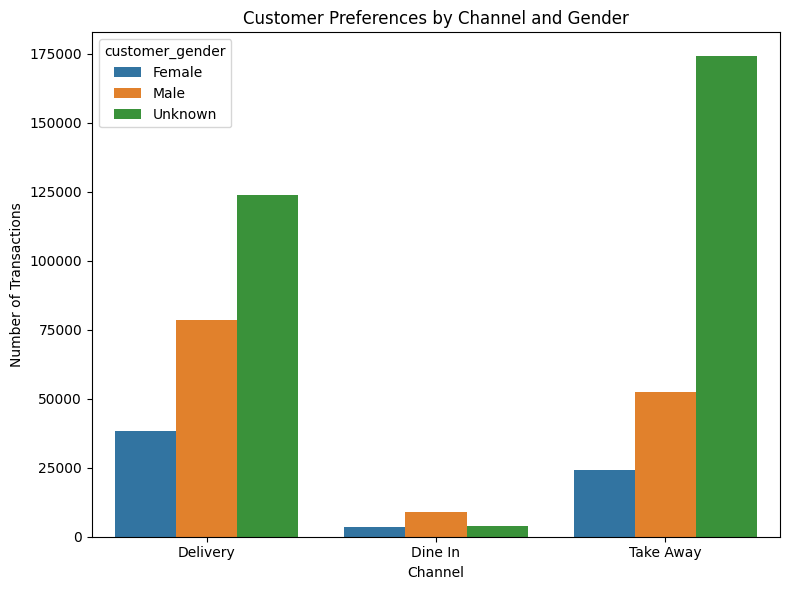

In [48]:
# Group by channel and customer gender to analyze preferences
customer_channel_gender = df.groupby(['channel', 'customer_gender']).size().reset_index(name='count')

# Plot the preferences by channel and gender
plt.figure(figsize=(8, 6))
sns.barplot(data=customer_channel_gender, x='channel', y='count', hue='customer_gender')

plt.title('Customer Preferences by Channel and Gender')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

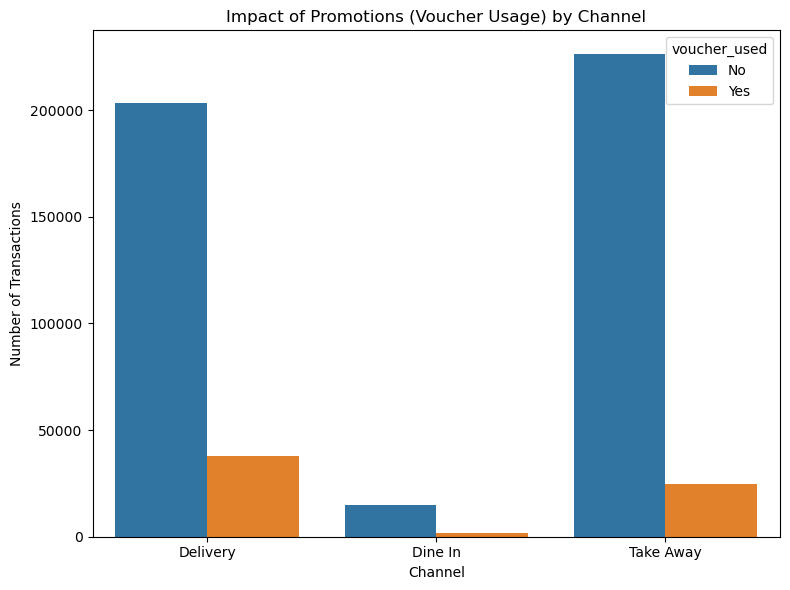

In [17]:
# Group by channel and voucher usage to analyze the impact of promotions
voucher_usage_channel = df.groupby(['channel', 'voucher_used']).size().reset_index(name='count')

# Plot the impact of promotions
plt.figure(figsize=(8, 6))
sns.barplot(data=voucher_usage_channel, x='channel', y='count', hue='voucher_used')

plt.title('Impact of Promotions (Voucher Usage) by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

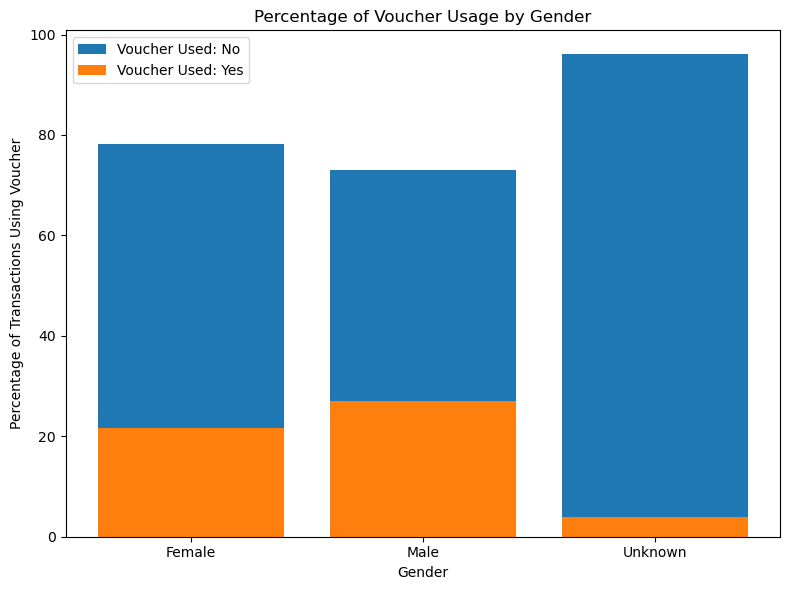

In [18]:
# Group by gender and voucher usage to analyze the likelihood of voucher usage
voucher_usage_gender = df.groupby(['customer_gender', 'voucher_used']).size().reset_index(name='count')

# Calculate the total number of transactions per gender
total_transactions_gender = df['customer_gender'].value_counts().reset_index()
total_transactions_gender.columns = ['customer_gender', 'total_transactions']

# Merge the data to compute the percentage of voucher usage by gender
voucher_usage_gender = voucher_usage_gender.merge(total_transactions_gender, on='customer_gender')
voucher_usage_gender['percentage'] = (voucher_usage_gender['count'] / voucher_usage_gender['total_transactions']) * 100

# Plot the percentage of voucher usage by gender using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot data for each voucher usage category
for voucher in voucher_usage_gender['voucher_used'].unique():
    data = voucher_usage_gender[voucher_usage_gender['voucher_used'] == voucher]
    ax.bar(data['customer_gender'], data['percentage'], label=f'Voucher Used: {voucher}')

# Customize the plot
ax.set_title('Percentage of Voucher Usage by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of Transactions Using Voucher')
ax.legend()
plt.tight_layout()
plt.show()


In [32]:
import datetime

# 1. Recency Calculation

# Step 1: Group by 'customer_id' and get the most recent 'transaction_date'
R = df.groupby('customer_id')['transaction_date'].max().reset_index()

# Step 2: Convert 'transaction_date' to datetime format without timezone
R['transaction_date'] = pd.to_datetime(R['transaction_date']).dt.tz_convert(None)

# Step 3: Set the reporting date (reference date)
reporttime = datetime.date(2023, 2, 1)

# Step 4: Calculate DateDiff (days since last purchase)
R['DateDiff'] = (pd.to_datetime(reporttime) - R['transaction_date']).dt.days

# Step 5: Quantile for Recency
Q1_R = R['DateDiff'].quantile(0.25)
Q2_R = R['DateDiff'].mean()
Q3_R = R['DateDiff'].quantile(0.75)

# Step 6: Recency Binning
R_seprate = lambda x: 4 if x < Q1_R else (3 if x >= Q1_R and x < Q2_R else (2 if x >= Q2_R and x < Q3_R else 1))
R['R'] = R['DateDiff'].apply(R_seprate)

# 2. Frequency Calculation

# Step 1: Group by 'customer_id' and count the number of transactions (bill_id)
F = df.groupby('customer_id')['bill_id'].count().reset_index()
F.rename(columns={'bill_id': 'Frequency'}, inplace=True)

# Step 2: Frequency Binning
F_seprate = lambda x: 1 if x < 15 else (2 if x >= 15 and x < 40 else (3 if x >= 40 and x < 80 else 4))
F['F'] = F['Frequency'].apply(F_seprate)

# 3. Monetary Calculation

# Step 1: Group by 'customer_id' and sum the 'sales_amount'
M = df.groupby('customer_id').agg({'sales_amount': 'sum'}).reset_index()

# Step 2: Quantile for Monetary
Q1_M = M['sales_amount'].quantile(0.25)
Q2_M = M['sales_amount'].mean()
Q3_M = M['sales_amount'].quantile(0.75)

# Step 3: Monetary Binning
M_seprate = lambda x: 1 if x < Q1_M else (2 if x >= Q1_M and x < Q2_M else (3 if x >= Q2_M and x < Q3_M else 4))
M['M'] = M['sales_amount'].apply(M_seprate)

# 4. Merge R, F, M dataframes

# Merge Recency, Frequency, and Monetary data
RFM = R.merge(F[['customer_id', 'F']], on='customer_id', how='inner').merge(M[['customer_id', 'M']], on='customer_id', how='inner')

# Step 5: Create a combined RFM Score
RFM['RFM'] = RFM[['R', 'F', 'M']].apply(lambda x: ''.join(map(str, x)), axis=1)

# 5. Segmentation

# Define segmentation logic (customize based on RFM score)
RFM['segment'] = RFM['RFM'].apply(lambda x: 'Lost' if x == '111' else ('At risk' if '1' in x else 'Potential Loyal'))
print(RFM.head(20))

    customer_id transaction_date  DateDiff  R  F  M  RFM  segment
0             0       2021-12-23       405  1  1  2  112  At risk
1             1       2022-01-29       368  1  1  2  112  At risk
2             2       2023-05-30      -118  4  1  2  412  At risk
3             3       2022-05-23       254  2  1  1  211  At risk
4             4       2022-06-13       233  2  1  1  211  At risk
5             5       2022-10-13       111  3  1  1  311  At risk
6             6       2022-08-13       172  2  1  3  213  At risk
7             7       2022-12-11        52  3  1  2  312  At risk
8             8       2023-01-18        14  3  1  2  312  At risk
9             9       2022-03-02       336  1  1  2  112  At risk
10           10       2023-06-23      -142  4  1  2  412  At risk
11           11       2022-04-30       277  2  1  2  212  At risk
12           12       2022-09-18       136  3  1  3  313  At risk
13           13       2022-04-06       301  2  1  1  211  At risk
14        

In [34]:
segment_counts = RFM.groupby('segment').size().reset_index(name='customer_count')
print(segment_counts)

           segment  customer_count
0          At risk          320692
1             Lost           24546
2  Potential Loyal             346
